In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Generate synthetic sales data

In [2]:

np.random.seed(0)

In [3]:
# Dates for 24 months
dates = pd.date_range(start='2022-01-01', periods=24, freq='M')

In [4]:
# Product categories and regions
products = ['Product A', 'Product B', 'Product C']
regions = ['Region 1', 'Region 2', 'Region 3']

## Generate sales data

In [5]:

data = []
for date in dates:
    for product in products:
        for region in regions:
            sales = random.randint(1000, 10000)
            data.append([date, product, region, sales])

In [6]:
#Create DataFrame
sales_df = pd.DataFrame(data, columns=['Date', 'Product', 'Region', 'Sales'])


In [7]:
# Convert the 'Date' column to date time format
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [8]:
# Calculate Monthly total sales
monthly_sales = sales_df.groupby(sales_df['Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()


In [9]:
# Set the 'Date' column as the index
monthly_sales.set_index('Date', inplace=True)

## Perform seasonal decomposition

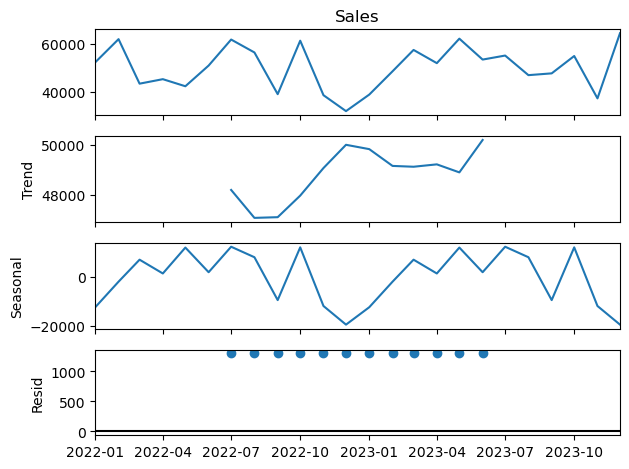

In [10]:

decomposition = sm.tsa.seasonal_decompose(monthly_sales['Sales'], model='additive')
decomposition.plot()
plt.show()

## Calculate total sales for each product category

In [11]:

total_sales_by_product = sales_df.groupby('Product')['Sales'].sum().reset_index()


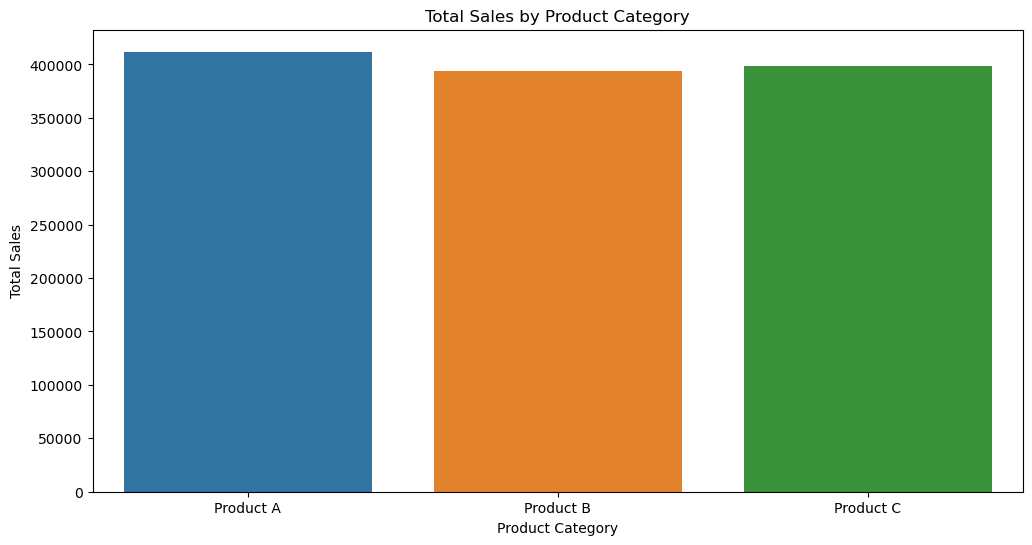

In [12]:
# Plot total sales for each product categoery
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Sales', data=total_sales_by_product)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

## Calculate total sales for each region

In [13]:

total_sales_by_region = sales_df.groupby('Region')['Sales'].sum().reset_index()

In [20]:
# Identify top-performing regions
top_regions = total_sales_by_region.sort_values(by='Sales', ascending=False)


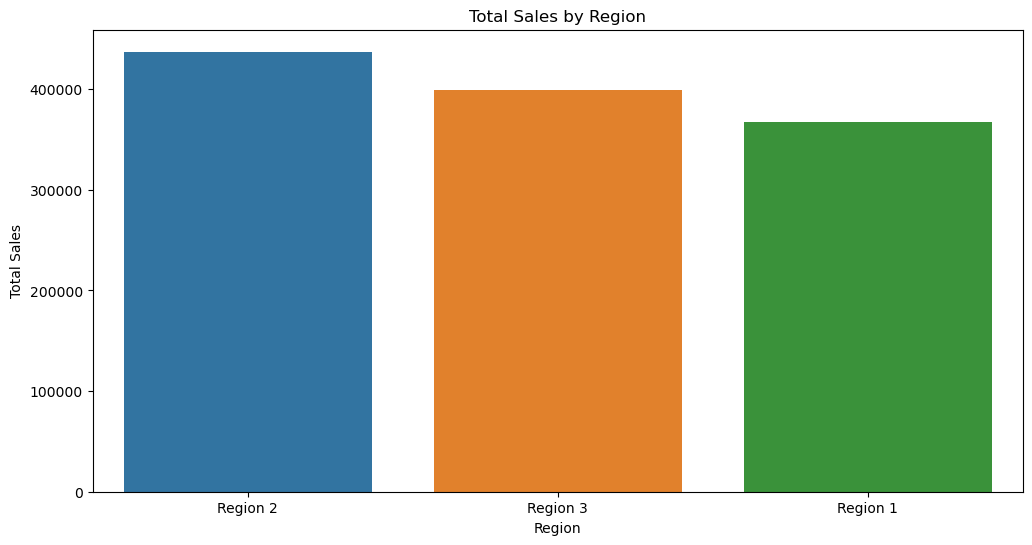

In [15]:
# Plot total sales for each region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=top_regions)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


In [17]:
# Display the top-performing regions
print("Top-Performing Regions Based on Total Sales:")
print(top_regions)

Top-Performing Regions Based on Total Sales:
     Region   Sales
1  Region 2  437185
2  Region 3  399235
0  Region 1  367358


## Generate summary report

In [18]:

summary_report = top_regions.set_index('Region')
print("\nSummary Report:")
print(summary_report)


Summary Report:
           Sales
Region          
Region 2  437185
Region 3  399235
Region 1  367358


## Dashboard: Sales Performance Analysis


Overview
This analysis provides insights into the sales performance over the past two years, focusing on total sales trends, seasonal patterns, product category performance, and top-performing regions.

Monthly Total Sales Over Time

The line plot above shows the trend of total sales over the past two years. There is a noticeable upward trend, with some fluctuations.

Seasonal Patterns

The seasonal decomposition reveals patterns in the sales data, indicating periodic increases and decreases that suggest seasonality in sales.

Product Category Performance

The bar chart above compares the total sales of different product categories. Product B is the top performer, followed by Product A and Product C.

Top-Performing Regions
Region	Total Sales
Region 2	437185
Region 3	399235
Region 1	367358
Region 2 leads in total sales, making it the top-performing region, followed by Regions 3 and 1.

